In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
ads = pd.DataFrame(pd.read_csv('/content/advertising.csv'))
ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ads.shape

(200, 4)

In [4]:
ads.size

800

In [5]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


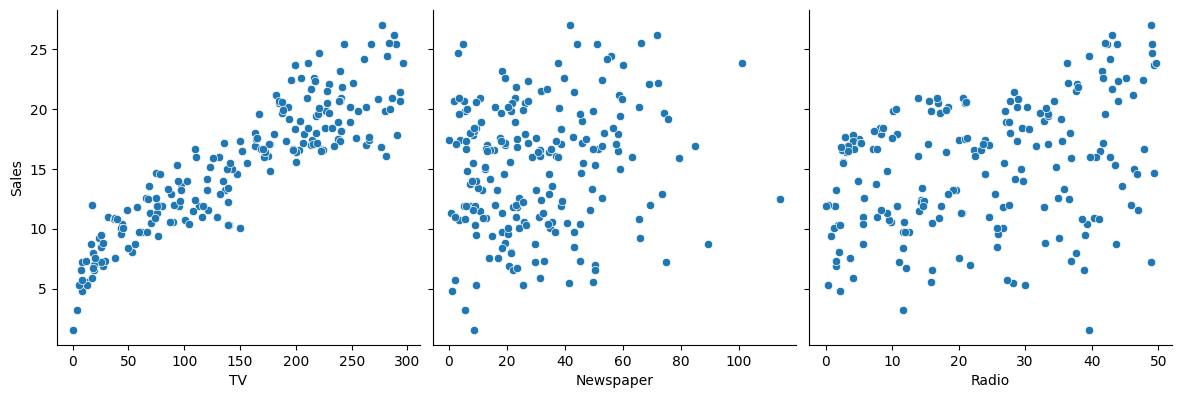

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(ads, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

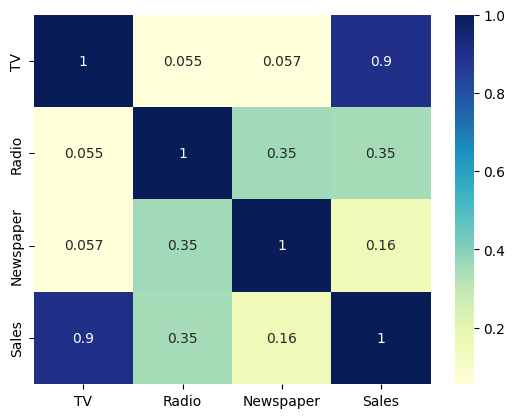

In [17]:
sns.heatmap(ads.corr(), cmap="YlGnBu", annot = True)
plt.show()
#Sales and TV are dependent on each other

In [18]:
X= ads['TV']
y=ads['Sales']

In [37]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(ads[['TV']],ads[['Sales']],train_size=0.7,test_size=0.3,random_state=100)

In [38]:
print(X_train)

        TV
74   213.4
3    151.5
185  205.0
26   142.9
90   134.3
..     ...
87   110.7
103  187.9
67   139.3
24    62.3
8      8.6

[140 rows x 1 columns]


In [39]:
print(y_train)

     Sales
74    17.0
3     16.5
185   22.6
26    15.0
90    14.0
..     ...
87    16.0
103   19.7
67    13.4
24     9.7
8      4.8

[140 rows x 1 columns]


In [40]:
print(X_test)

        TV
126    7.8
104  238.2
99   135.2
92   217.7
111  241.7
167  206.8
116  139.2
96   197.6
52   216.4
69   216.8
164  117.2
124  229.5
182   56.2
154  187.8
125   87.2
196   94.2
194  149.7
177  170.2
163  163.5
31   112.9
11   214.7
73   129.4
15   195.4
41   177.0
97   184.9
128  220.3
133  219.8
82    75.3
139  184.9
123  123.1
83    68.4
65    69.0
151  121.0
162  188.4
170   50.0
77   120.5
32    97.2
173  168.4
174  222.4
85   193.2
168  215.4
112  175.7
171  164.5
181  218.5
7    120.2
46    89.7
75    16.9
28   248.8
29    70.6
195   38.2
40   202.5
153  171.3
115   75.1
64   131.1
59   210.7
1     44.5
192   17.2
136   25.6
152  197.6
161   85.7


In [41]:
print(y_test)

     Sales
126    6.6
104   20.7
99    17.2
92    19.4
111   21.8
167   17.2
116   12.2
96    16.7
52    22.6
69    22.3
164   11.9
124   19.7
182    8.7
154   20.6
125   10.6
196   14.0
194   17.3
177   16.7
163   18.0
31    11.9
11    17.4
73    11.0
15    22.4
41    17.1
97    20.5
128   24.7
133   19.6
82    11.3
139   20.7
123   15.2
83    13.6
65    11.3
151   11.6
162   19.9
170    8.4
77    14.2
32    13.2
173   16.7
174   16.5
85    20.2
168   17.1
112   17.1
171   17.5
181   17.2
7     13.2
46    10.6
75     8.7
28    18.9
29    10.5
195    7.6
40    16.6
153   16.0
115   12.6
64    16.0
59    18.4
1     10.4
192    5.9
136    9.5
152   16.6
161   13.3


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Reshape X_train to be a 2D array
X_train_reshaped = X_train.values.reshape(-1, 1)  # -1 infers the number of samples based on the length of the array
model.fit(X_train_reshaped,y_train)

LinearRegression()

In [43]:
res = model.predict(X_test)
print(res)

[ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [45]:
model.coef_

array([0.05454575])

In [46]:
model.intercept_

6.948683200001357

In [47]:
0.05454575 * 69.5 + 6.948683200001357

10.739612825001357

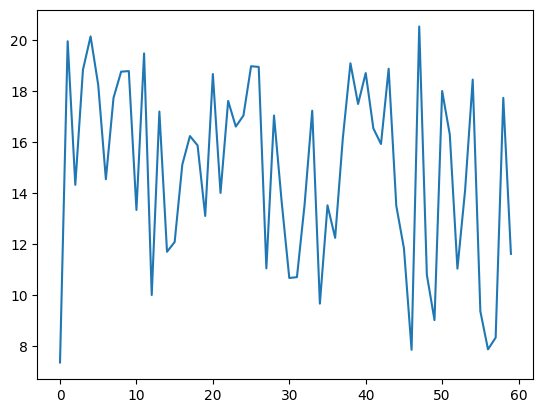

In [35]:
plt.plot(res)